In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [73]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = 'Linear Regression Model')

In [74]:
# import data
ball_milling_data = pd.read_excel('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/ALM Ortho Powders/ALM Ortho Powder Data Prepared for Professor Kordijazi.xlsx')
ball_milling_data = ball_milling_data.loc[(ball_milling_data['Feret'] >= 40) & (ball_milling_data['Feret'] <= 100)]
ball_milling_data.columns

Index(['Lot', 'GroupID', 'Reuse Cycles', 'Area', 'X', 'Y', 'Perim.', 'BX',
       'BY', 'Width', 'Height', 'Major', 'Minor', 'Angle', 'Circ.', 'Feret',
       'IntDen', 'RawIntDen', 'FeretX', 'FeretY', 'FeretAngle', 'MinFeret',
       'AR', 'Round', 'Solidity', 'Aluminum (wt%)', 'Iron (wt%)',
       'Oxygen (wt%)', 'Vanadium (wt%)', 'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

In [75]:
X_train = ball_milling_data[['Reuse Cycles']]
y_train = ball_milling_data['Oxygen (wt%)']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_train

0     0.153000
1     0.111000
2     0.152000
3     0.184000
4     0.199667
5     0.116000
6     0.157000
7     0.231500
8     0.000000
9     0.209667
10    0.000000
11    0.000000
12    0.155000
13    0.176000
14    0.199000
15    0.144000
16    0.156000
17    0.147000
18    0.154000
19    0.160000
20    0.136000
Name: Oxygen (wt%), dtype: float64

In [76]:
r2_score(y_true=y_train, y_pred=y_pred)

0.3744910037066582

In [77]:
b = lr.intercept_
m = lr.coef_
m

array([0.01258828])

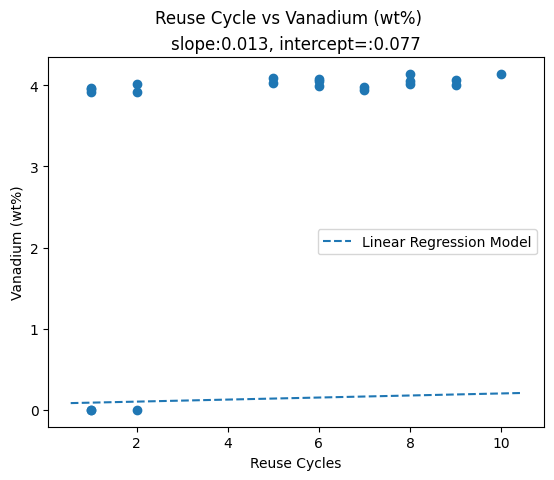

In [78]:




b = lr.intercept_
m = lr.coef_

plt.scatter(ball_milling_data['Reuse Cycles'], ball_milling_data['Vanadium (wt%)'])
abline(m, b) 
plt.xlabel('Reuse Cycles')
plt.ylabel('Vanadium (wt%)')
plt.suptitle('Reuse Cycle vs Vanadium (wt%)')
plt.title(f'slope:{m[0]:.3f}, intercept=:{b:.3f}')
plt.legend()

In [79]:
# show predictionrs 
predictions = pd.DataFrame({'Reuse Cycles': ball_milling_data['Reuse Cycles'],
                            'Vanadium (wt%)':ball_milling_data['Vanadium (wt%)'],
                            'Regression Model Prediction for Vanadium (wt%)':y_pred})

predictions

,Reuse Cycles,Vanadium (wt%),Regression Model Prediction for Vanadium (wt%)
0,1.0,3.97,0.089687
1,2.0,4.01,0.102275
2,8.0,4.14,0.177805
3,10.0,4.14,0.202981
4,8.0,4.01,0.177805
5,1.0,3.95,0.089687
6,1.0,3.92,0.089687
7,8.0,4.05,0.177805
8,1.0,0.00,0.089687
9,7.0,3.98,0.165216


Text(0.5, 0.98, 'Scatter Plot of Actual Vanadium (wt%) Values vs.Linear Regression Predicted Vanadium (wt%) Values')

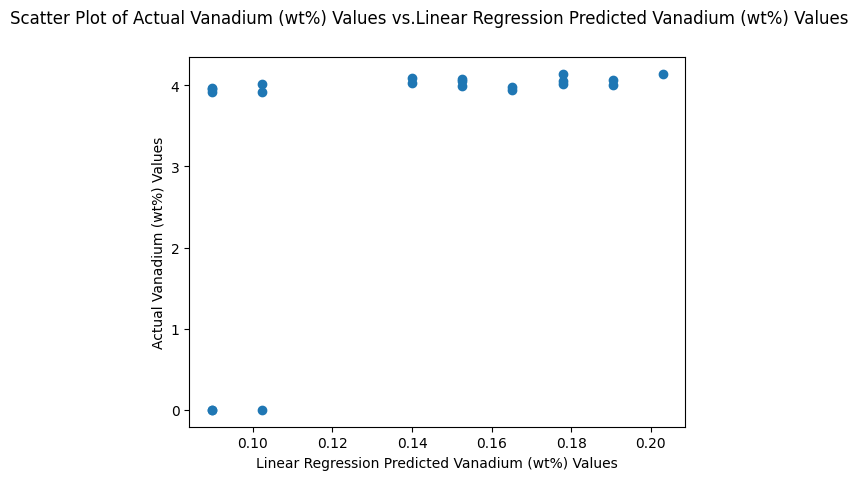

In [80]:
plt.scatter( predictions['Regression Model Prediction for Vanadium (wt%)'], predictions['Vanadium (wt%)'])
plt.ylabel('Actual Vanadium (wt%) Values')
plt.xlabel('Linear Regression Predicted Vanadium (wt%) Values')
plt.suptitle('Scatter Plot of Actual Vanadium (wt%) Values vs.Linear Regression Predicted Vanadium (wt%) Values')